In [11]:
import sqlite3

# Connect to SQLite DB
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')


cursor.execute("DELETE FROM sales")

# Insert updated sample data
sample_data = [
    ('Apple', 12, 0.50),
    ('Banana', 10, 0.30),
    ('Orange', 8, 0.70),
    ('Grapes', 15, 1.20),
    ('Watermelon', 2, 3.00),
    ('Coca-Cola', 6, 1.00),
    ('Pepsi', 5, 0.95),
    ('Chips', 7, 1.50),
    ('Chocolate', 4, 2.00),
    ('Bread', 3, 1.75),
    ('Milk', 6, 1.10),
    ('Butter', 2, 2.50),
    ('Juice', 4, 2.20),
    ('Cookies', 5, 1.80),
    ('Yogurt', 3, 1.30)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)

# Save and close
conn.commit()

print("Sample data inserted.")


Sample data inserted.


In [14]:
import pandas as pd

# SQL query to summarize sales
query = '''
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
'''

# Load results into a DataFrame
df = pd.read_sql_query(query, conn)
print("Sales Summary:\n")
print(df)


Sales Summary:

       product  total_qty  revenue
0        Apple         12     6.00
1       Banana         10     3.00
2        Bread          3     5.25
3       Butter          2     5.00
4        Chips          7    10.50
5    Chocolate          4     8.00
6    Coca-Cola          6     6.00
7      Cookies          5     9.00
8       Grapes         15    18.00
9        Juice          4     8.80
10        Milk          6     6.60
11      Orange          8     5.60
12       Pepsi          5     4.75
13  Watermelon          2     6.00
14      Yogurt          3     3.90


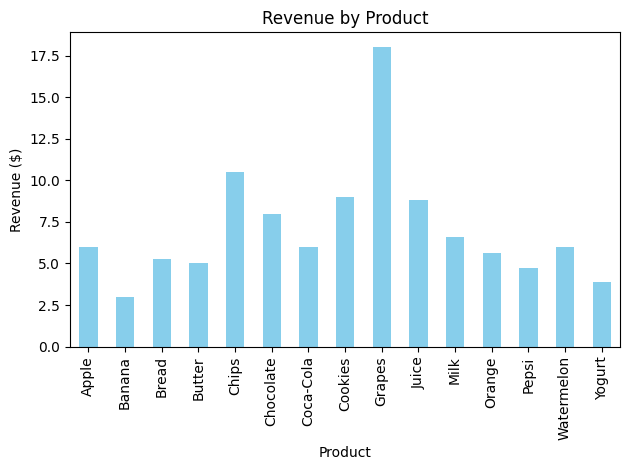

In [6]:
import matplotlib.pyplot as plt

# Create bar chart
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.show()
